--- albedo ---
slope: 0.0003441539599527991, intercept: -0.011857774835722496, p_value: 0.00036705332340902785, lower_slope: 0.00015991194369675582, upper_slope: 0.0005296146346920864


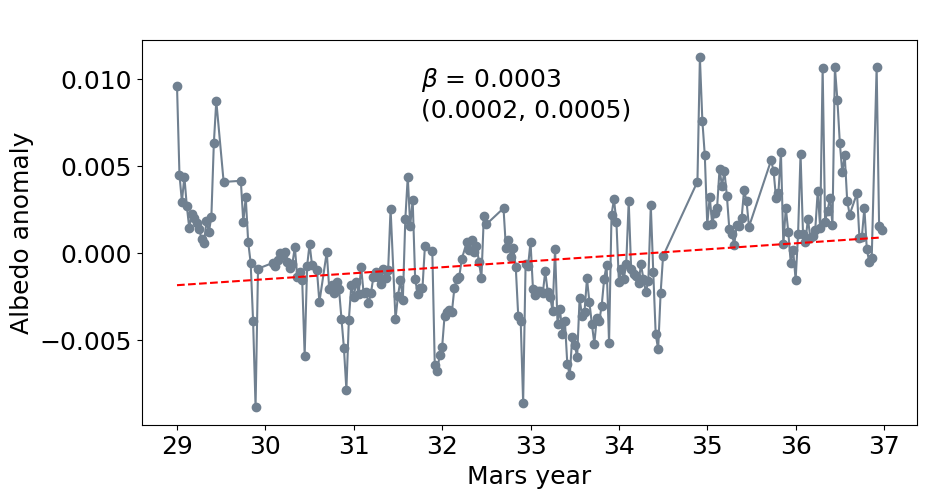

--- ti ---
slope: 0.3588763507452465, intercept: -11.8256096562981, p_value: 1.6381292777811751e-06, lower_slope: 0.220030891786899, upper_slope: 0.49373355055306084


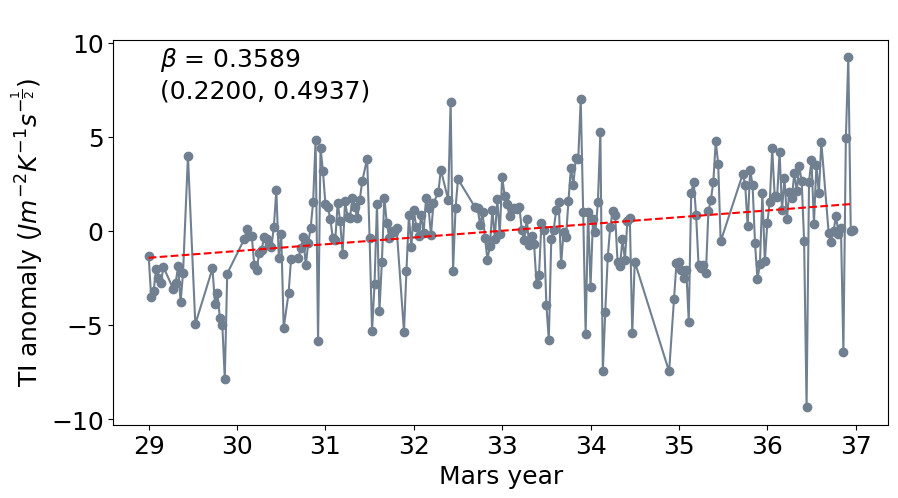

--- dust ---
slope: 0.0005309284914484124, intercept: -0.01914611035265752, p_value: 0.13299263679786044, lower_slope: -0.0001627190192208403, upper_slope: 0.0013016743806892601


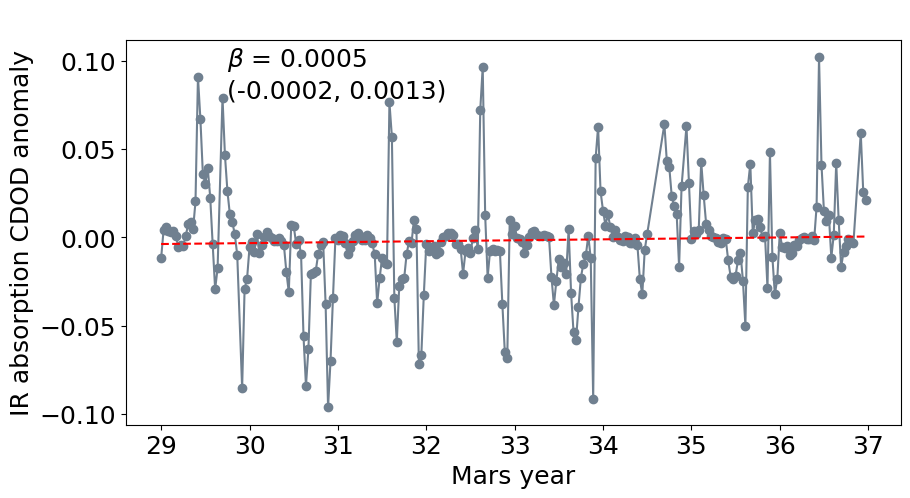

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from scipy.stats import theilslopes
import pymannkendall as mk

# --- Configuration ---
# Define the base directory to avoid repetition
BASE_DIR = '../archive/data'

# --- Plotting Helper Functions ---
def modify_plot(ax):
    ax.tick_params(labelsize=18)

def set_title(ax, title='', label_x='', label_y=''):
    ax.set_title(title, loc='center', fontdict={'size': 20})
    ax.set_xlabel(label_x, fontdict={'size': 18})
    ax.set_ylabel(label_y, fontdict={'size': 18})

def plot_trend_analysis(filename, var_name, label_y, text_coords):
    """
    Loads data, calculates statistics, and generates the plot 
    using the specific archive settings.
    """
    # 1. Load Data
    file_path = os.path.join(BASE_DIR, filename)
    ds = xr.open_dataset(file_path)[var_name]
    y = ds.values
    x = ds.MY.values

    # 2. Statistical Analysis
    slope, intercept, lower_slope, upper_slope = theilslopes(y, x)
    p_value = mk.original_test(y).p
    
    # 3. Fit Line Calculation
    x_fit = np.linspace(x[0], x[-1], len(x))
    y_fit = slope * x_fit + intercept

    # Print statistics for record
    print(f'--- {var_name} ---')
    print(f'slope: {slope}, intercept: {intercept}, p_value: {p_value}, '
          f'lower_slope: {lower_slope}, upper_slope: {upper_slope}')

    # 4. Plotting
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Data and Trendline
    ax.plot(x, y, c='slategrey')
    ax.scatter(x, y, c='slategrey')
    ax.plot(x_fit, y_fit, c='red', linestyle='--')

    # Apply Style Settings
    modify_plot(ax)
    set_title(ax, title=' ', label_x='Mars year', label_y=label_y)

    # Annotations
    # text_coords is a tuple (x_pos, y_pos) for the first line of text
    tx, ty = text_coords
    ax.text(tx, ty, r'$\beta$ '+f'= {slope:.4f}', transform=ax.transAxes, fontsize=18)
    
    # The second line is consistently placed 0.08 units below the first in your original code
    ax.text(tx, ty - 0.08, f'({lower_slope:.4f}, {upper_slope:.4f})', transform=ax.transAxes, fontsize=18)

    plt.show()

# --- Execution ---

# 1. Albedo
plot_trend_analysis(
    filename='albedo_trend_1d.nc',
    var_name='albedo',
    label_y='Albedo anomaly',
    text_coords=(0.36, 0.88)
)

# 2. TI (Thermal Inertia)
plot_trend_analysis(
    filename='ti_trend_1d.nc',
    var_name='ti',
    label_y=r'TI anomaly ($Jm^{-2}K^{-1}s^{- \frac{1}{2}}$)',
    text_coords=(0.06, 0.93)
)

# 3. Dust
plot_trend_analysis(
    filename='dust_trend_1d.nc',
    var_name='dust',
    label_y='IR absorption CDOD anomaly',
    text_coords=(0.13, 0.93)
)